# Multiple Classification Analysis for Loan Grade Prediction for 20 to 40 Years Old Applicants

## About Dataset
Detailed data description of Credit Risk dataset:

Dataset consist 32581 records and 12 columns:
- person_age (Age)
- person_income (Annual Income)
- person_home_ownership (Home ownership)
- person_emp_length (Employment length (in years))
- loan_intent	(Loan intent)
- loan_grade (Loan grade)
- loan_amnt (Loan amount)
- loan_int_rate (Interest rate)
- loan_status	(Loan status)
- loan_percent_income (Percent income)
- cb_person_default_on_file (Historical default)
- cb_preson_cred_hist_length (Credit history length)

## Objective

The objective of this project is to develop a predictive model for loan grade classification using a dataset comprising 32,581 records and 12 features related to loan applicants. The target variable, loan grade, represents the risk associated with each loan application. The project involves comprehensive data exploration, preprocessing, and feature engineering to ensure the quality of input data. Subsequently, six classification models, including Logistic Regression, XGBoost, Random Forest, Decision Tree, k-NN, and SVM, will be trained and evaluated on the dataset. The aim is to identify the most effective model in predicting loan grades based on metrics such as accuracy, precision, recall, and F1-score. The project also encompasses hyperparameter tuning, model interpretability, handling of imbalanced classes, and considerations for ethical implications. Ultimately, the developed model seeks to assist financial institutions in making informed decisions regarding loan approvals by providing a robust and accurate classification of loan grades.

## Training Models:

- Logistic Regression
- XGBoost
- Random Forest
- Decision Tree
- k-NN
- SVM
- Naive Bayes

# Environment Preparation

## Import software libraries

In [1]:
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import seaborn as sns 
import matplotlib.pyplot as plt
import category_encoders as ce                              # Encode data.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    RandomizedSearchCV, \
                                    GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, \
                            confusion_matrix, \
                            f1_score, \
                            recall_score, \
                            precision_score, \
                            roc_curve, \
                            precision_recall_curve, \
                            ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
import xgboost                                              # Build gradient boosting models.
from xgboost import XGBClassifier
import imblearn                                             # Deal with imbalanced data.
from imblearn.over_sampling import SMOTE                    # Perform oversampling.
from collections import Counter                             # Count objects in containers.
import pickle                                               # Save Python objects as binary files.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Ensure results are reproducible.
np.random.seed(1)

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- Category Encoders {}'.format(ce.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- XGBoost {}'.format(xgboost.__version__))
print('- imbalanced-learn {}\n'.format(imblearn.__version__))

Libraries used in this project:
- Python 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.23.5
- pandas 1.5.3
- Matplotlib 3.7.0
- Seaborn 0.12.2
- Category Encoders 2.6.3
- scikit-learn 1.2.2
- XGBoost 2.0.2
- imbalanced-learn 0.10.1



# Data Preparation

## Load and preview the data

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv(R"C:\Users\Dell\Downloads\multiple classification\Credit Risk\credit_risk_dataset.csv")
data.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Check the shape of the data

In [3]:
data.shape

(32581, 12)

## Check the unique number of columns

In [4]:
data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

## Check the data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Generate summary statistics for all of the data

In [6]:
data.describe(datetime_is_numeric = True, include = 'all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


## Count column values

In [7]:
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for person_age:
23     3889
22     3633
24     3549
25     3037
26     2477
27     2138
28     1854
29     1687
30     1316
21     1229
31     1142
32      964
33      856
34      709
35      620
36      548
37      478
38      373
39      302
40      271
41      241
42      188
43      164
44      141
45      108
46       94
47       94
48       75
50       52
49       49
51       39
52       36
53       30
54       24
55       20
58       19
56       15
57       15
20       15
60       15
65        9
66        9
61        9
70        7
64        7
62        7
59        5
69        5
144       3
73        3
63        3
123       2
78        1
94        1
80        1
84        1
76        1
67        1
Name: person_age, dtype: int64

Value counts for person_income:
60000    1046
30000     847
50000     778
40000     658
45000     590
         ... 
54316       1
54480       1
72645       1
72893       1
4888        1
Name: person_income, Length: 4295, dtype: int64

Value co

## Identify missing values

In [8]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# Data Cleaning

## Drop missing values

In [9]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


## Plot histograms for all numerical columns

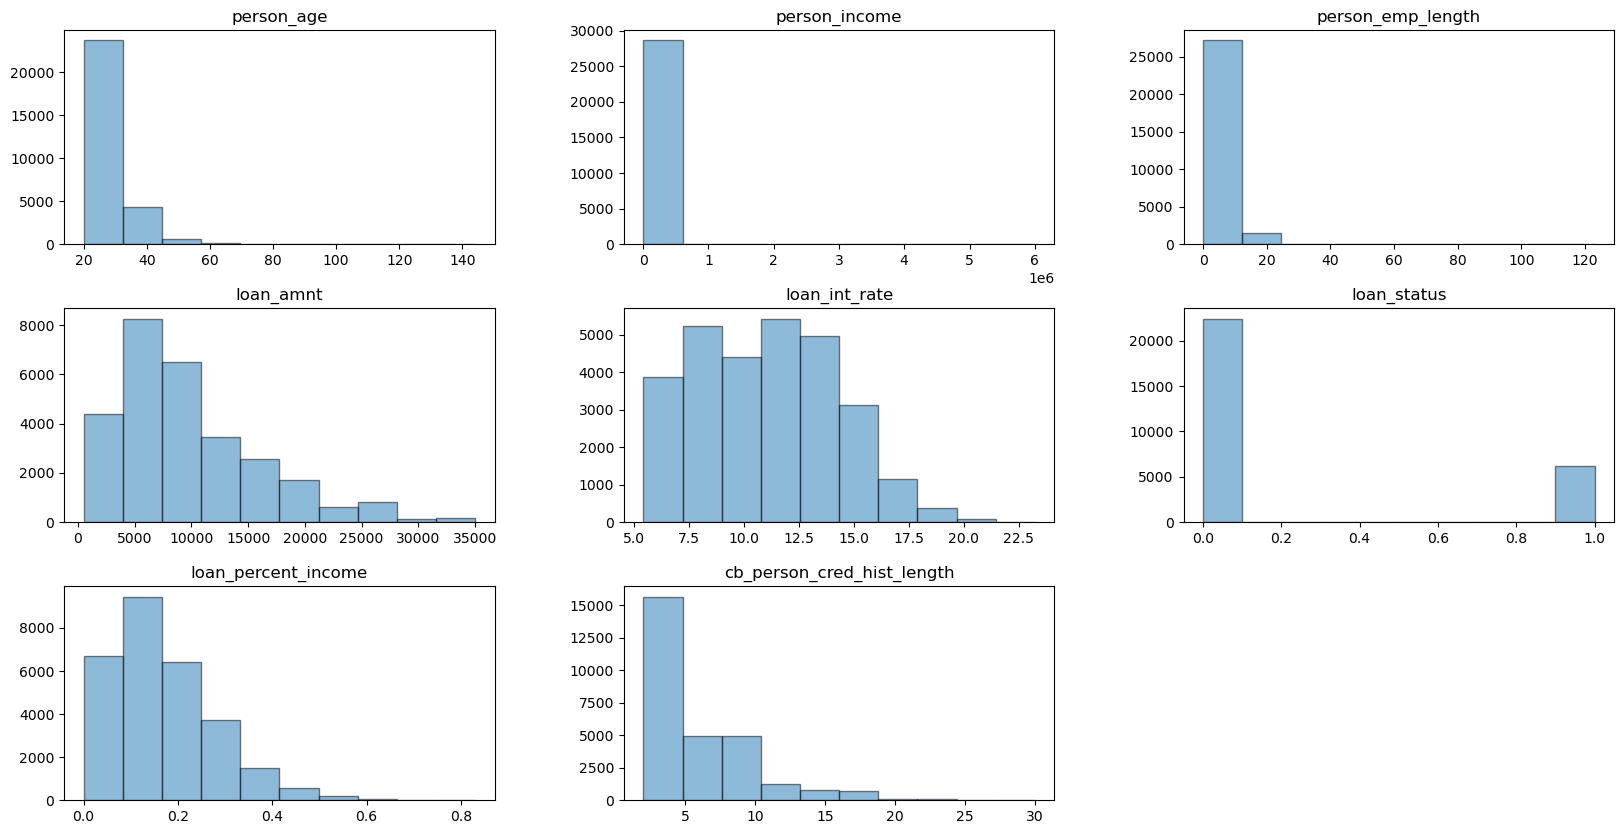

In [10]:
data_for_hist = data.select_dtypes(exclude = ['bool'])
data_for_hist.hist(figsize = (20, 10), alpha = 0.5, edgecolor = 'black', grid = False);

## Generate a box plot for numerical columns

In [11]:
col = list(data.select_dtypes(['int64', 'float64']).columns)

print('The number of numerical columns:',
      len(col))
print('The names of numerical columns:',
      col)

The number of numerical columns: 8
The names of numerical columns: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


In [12]:
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
           'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
data[columns].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


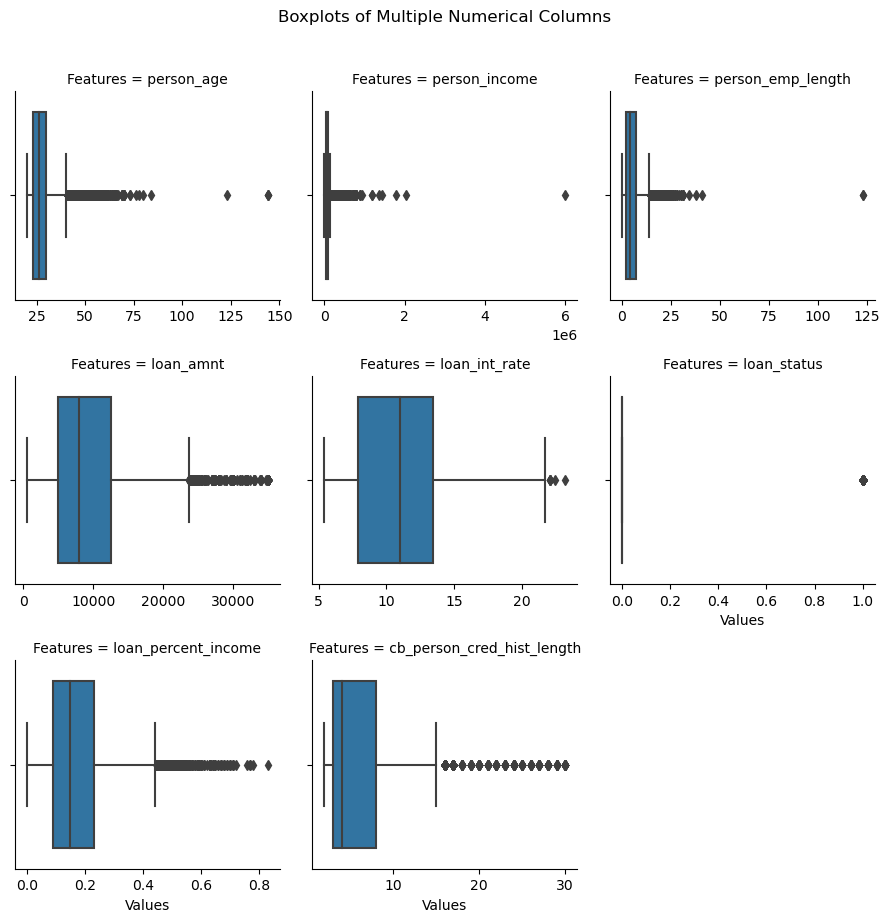

In [13]:
g = sns.FacetGrid(pd.melt(data[columns], var_name='Features'), col='Features', col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, 'value')

g.set_axis_labels('Values', '')
g.fig.suptitle('Boxplots of Multiple Numerical Columns', y=1.02)

plt.tight_layout()

plt.show()

## Identify outlier

In [14]:
for column in columns:
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1

    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr

    print(f'Column: {column}')
    print('Lower bound:', round(lb, 2))
    print('Upper bound:', round(ub, 2))
    print()
    
    num_above_ub = data[data[column] >= ub].shape[0]
    num_below_lb = data[data[column] <= lb].shape[0]
    
    print(f'Number of patients with {column} greater than UB: {num_above_ub}')
    print(f'Number of patients with {column} lower than LB: {num_below_lb}')
    print()

Column: person_age
Lower bound: 12.5
Upper bound: 40.5

Number of patients with person_age greater than UB: 1298
Number of patients with person_age lower than LB: 0

Column: person_income
Lower bound: -21300.0
Upper bound: 140780.0

Number of patients with person_income greater than UB: 1329
Number of patients with person_income lower than LB: 0

Column: person_emp_length
Lower bound: -5.5
Upper bound: 14.5

Number of patients with person_emp_length greater than UB: 773
Number of patients with person_emp_length lower than LB: 0

Column: loan_amnt
Lower bound: -6250.0
Upper bound: 23750.0

Number of patients with loan_amnt greater than UB: 1487
Number of patients with loan_amnt lower than LB: 0

Column: loan_int_rate
Lower bound: -0.47
Upper bound: 21.85

Number of patients with loan_int_rate greater than UB: 6
Number of patients with loan_int_rate lower than LB: 0

Column: loan_status
Lower bound: 0.0
Upper bound: 0.0

Number of patients with loan_status greater than UB: 28638
Number o

In [15]:
q1 = np.percentile(data['person_age'], 25)
q3 = np.percentile(data['person_age'], 75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

data = data[(data.person_age < ub) & (data.person_age > lb)]

data.shape

(27340, 12)

In [16]:
q1 = np.percentile(data['person_income'], 25)
q3 = np.percentile(data['person_income'], 75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

data = data[(data.person_income < ub) & (data.person_income > lb)]

data.shape

(26121, 12)

In [17]:
q1 = np.percentile(data['person_emp_length'], 25)
q3 = np.percentile(data['person_emp_length'], 75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

data = data[(data.person_emp_length < ub) & (data.person_emp_length > lb)]

data.shape

(25557, 12)

In [18]:
q1 = np.percentile(data['loan_amnt'], 25)
q3 = np.percentile(data['loan_amnt'], 75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

data = data[(data.loan_amnt < ub) & (data.loan_amnt > lb)]

data.shape

(24436, 12)

In [19]:
q1 = np.percentile(data['loan_int_rate'], 25)
q3 = np.percentile(data['loan_int_rate'], 75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

data = data[(data.loan_int_rate < ub) & (data.loan_int_rate > lb)]

data.shape

(24426, 12)

In [20]:
q1 = np.percentile(data['loan_percent_income'], 25)
q3 = np.percentile(data['loan_percent_income'], 75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

data = data[(data.loan_percent_income < ub) & (data.loan_percent_income > lb)]

data.shape

(23807, 12)

In [21]:
q1 = np.percentile(data['cb_person_cred_hist_length'], 25)
q3 = np.percentile(data['cb_person_cred_hist_length'], 75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

data = data[(data.cb_person_cred_hist_length < ub) & (data.cb_person_cred_hist_length > lb)]

data.shape

(22884, 12)

## Generate bar charts for categorical columns

In [22]:
categorical_columns = list(data.select_dtypes(['object']).columns)

print('The number of categorical features:',
      len(categorical_columns))
print('The names of categorical features:',
      categorical_columns)

The number of categorical features: 4
The names of categorical features: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [23]:
columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Calculate and print value counts for each column
for column in columns:
    value_counts = data[column].value_counts(dropna='False')
    print(f'Value counts for {column}:\n{value_counts}\n')

Value counts for person_home_ownership:
RENT        12105
MORTGAGE     8990
OWN          1716
OTHER          73
Name: person_home_ownership, dtype: int64

Value counts for loan_intent:
EDUCATION            4751
MEDICAL              4266
VENTURE              3981
PERSONAL             3819
DEBTCONSOLIDATION    3638
HOMEIMPROVEMENT      2429
Name: loan_intent, dtype: int64

Value counts for loan_grade:
A    7788
B    7208
C    4680
D    2438
E     629
F     114
G      27
Name: loan_grade, dtype: int64

Value counts for cb_person_default_on_file:
N    18899
Y     3985
Name: cb_person_default_on_file, dtype: int64



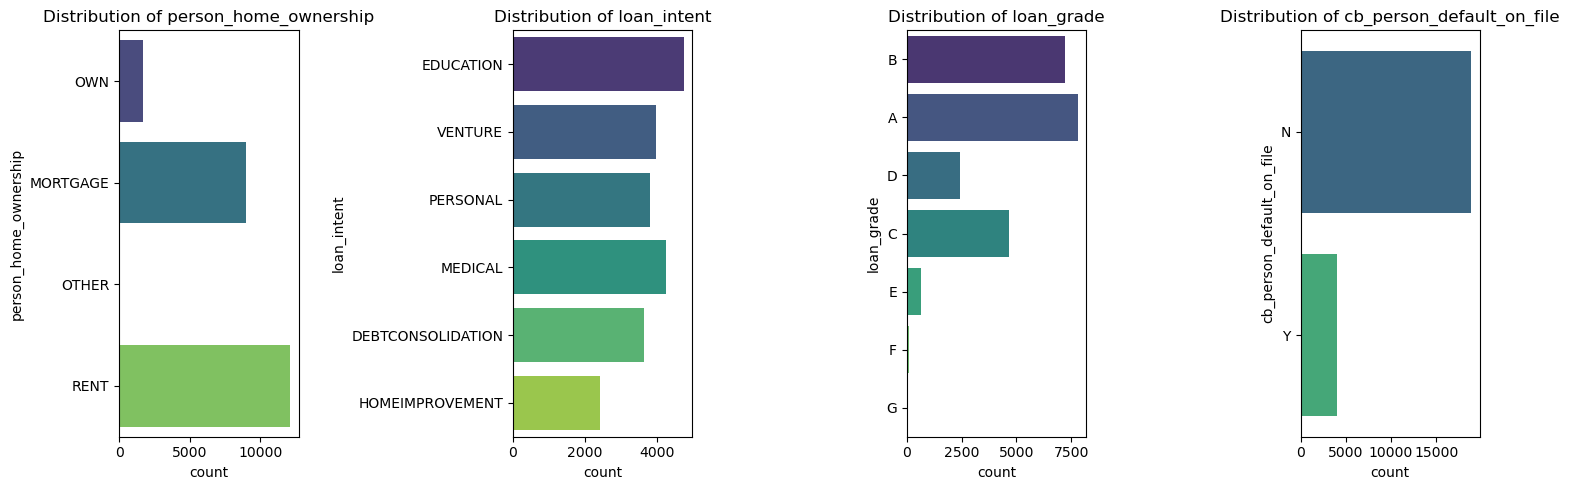

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

for i, column in enumerate(columns):
    sns.countplot(y=data[column], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()

plt.show()

## Mapping `person_home_ownership` Column Values

In [25]:
mapping = {
    'OWN': 'own',
    'MORTGAGE': 'mortgage',
    'OTHER': 'other',
    'RENT': 'rent'
}

# Replace values based on the mapping dictionary
data['person_home_ownership'].replace(mapping, inplace=True)

# Display the updated DataFrame
data['person_home_ownership'].value_counts()

rent        12105
mortgage     8990
own          1716
other          73
Name: person_home_ownership, dtype: int64

## Mapping `loan_intent` Column Values

In [26]:
mapping = {
    'EDUCATION': 'education',
    'MEDICAL': 'medical',
    'VENTURE': 'venture',
    'PERSONAL': 'personal',
    'DEBTCONSOLIDATION': 'debt_consolidation',
    'HOMEIMPROVEMENT': 'home_renovation'
}

# Replace values based on the mapping dictionary
data['loan_intent'].replace(mapping, inplace=True)

# Display the updated DataFrame
data['loan_intent'].value_counts()

education             4751
medical               4266
venture               3981
personal              3819
debt_consolidation    3638
home_renovation       2429
Name: loan_intent, dtype: int64

## Mapping `loan_grade` Column Values

In [27]:
mapping = {
    'E': 'D',
    'F': 'D',
    'G': 'D'
}

# Replace values based on the mapping dictionary
data['loan_grade'].replace(mapping, inplace=True)

# Display the updated DataFrame
data['loan_grade'].value_counts()

A    7788
B    7208
C    4680
D    3208
Name: loan_grade, dtype: int64

In [28]:
mapping = {
    'A': '0',
    'B': '1',
    'C': '2',
    'D': '3'
}

# Replace values based on the mapping dictionary
data['loan_grade'].replace(mapping, inplace=True)

# Display the updated DataFrame
data['loan_grade'].value_counts()

0    7788
1    7208
2    4680
3    3208
Name: loan_grade, dtype: int64

## Mapping `cb_person_default_on_file` Column Values

In [29]:
mapping = {
    'N': '0',
    'Y': '1'
}

# Replace values based on the mapping dictionary
data['cb_person_default_on_file'].replace(mapping, inplace=True)

# Display the updated DataFrame
data['cb_person_default_on_file'].value_counts()

0    18899
1     3985
Name: cb_person_default_on_file, dtype: int64

## Convertion of data types

In [30]:
# Assuming data is your pandas DataFrame
columns_to_convert_bool = ['loan_status', 'cb_person_default_on_file']

# Loop through each column and remove commas
for column in columns_to_convert_bool:
    data[column] = data[column].astype(bool)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22884 entries, 1 to 32248
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  22884 non-null  int64  
 1   person_income               22884 non-null  int64  
 2   person_home_ownership       22884 non-null  object 
 3   person_emp_length           22884 non-null  float64
 4   loan_intent                 22884 non-null  object 
 5   loan_grade                  22884 non-null  object 
 6   loan_amnt                   22884 non-null  int64  
 7   loan_int_rate               22884 non-null  float64
 8   loan_status                 22884 non-null  bool   
 9   loan_percent_income         22884 non-null  float64
 10  cb_person_default_on_file   22884 non-null  bool   
 11  cb_person_cred_hist_length  22884 non-null  int64  
dtypes: bool(2), float64(3), int64(4), object(3)
memory usage: 2.0+ MB


## Check Updated Data Details

In [32]:
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for person_age:
23    3152
22    2930
24    2808
25    2389
26    1952
27    1672
28    1433
29    1284
21     987
30     936
31     777
32     666
33     583
34     478
35     442
36     109
37      89
38      82
39      64
40      40
20      11
Name: person_age, dtype: int64

Value counts for person_income:
60000    797
30000    627
50000    612
40000    515
45000    472
        ... 
56208      1
86502      1
76460      1
75638      1
68480      1
Name: person_income, Length: 3019, dtype: int64

Value counts for person_home_ownership:
rent        12105
mortgage     8990
own          1716
other          73
Name: person_home_ownership, dtype: int64

Value counts for person_emp_length:
0.0     3083
2.0     2859
3.0     2594
5.0     2245
1.0     2194
4.0     2107
6.0     2027
7.0     1689
8.0     1246
9.0      965
10.0     516
11.0     508
12.0     380
13.0     285
14.0     186
Name: person_emp_length, dtype: int64

Value counts for loan_intent:
education             4751
me

In [33]:
data['cb_person_default_on_file'].value_counts()

True    22884
Name: cb_person_default_on_file, dtype: int64

## Remove `cb_person_default_on_file`, `loan_percent_income`, and `cb_person_cred_hist_length` Columns

In [34]:
columns_drop = ['cb_person_default_on_file','loan_percent_income','cb_person_cred_hist_length']
data.drop(columns = columns_drop, inplace=True)

In [35]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status
1,21,9600,own,5.0,education,1,1000,11.14,False
5,21,9900,own,2.0,venture,0,2500,7.14,True
9,21,10000,own,6.0,venture,3,1600,14.74,True
19,24,10800,mortgage,8.0,education,1,1750,10.99,True
23,24,10980,own,0.0,personal,0,1500,7.29,False
...,...,...,...,...,...,...,...,...,...
32215,39,24000,rent,1.0,debt_consolidation,0,8500,7.49,True
32222,36,136000,mortgage,0.0,education,2,4800,14.72,False
32230,37,65000,rent,7.0,home_renovation,2,12000,13.98,False
32243,37,68480,rent,2.0,medical,2,3600,15.23,False


In [36]:
data.shape

(22884, 9)

# Data Preprocessing

## Identify categorical features

In [37]:
categorical_columns = list(data.select_dtypes(['object']).columns)

print('The number of categorical features:',
      len(categorical_columns))
print('The names of categorical features:',
      categorical_columns)

The number of categorical features: 3
The names of categorical features: ['person_home_ownership', 'loan_intent', 'loan_grade']


In [38]:
cols = ['person_home_ownership', 'loan_intent']

encoder = ce.OneHotEncoder(cols = cols,
                           return_df = True,
                           use_cat_names = True)

In [39]:
# Fit and transform data.

data_encoded = encoder.fit_transform(data)

# Preview the data.

data_encoded.head()

,person_age,person_income,person_home_ownership_own,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_rent,person_emp_length,loan_intent_education,loan_intent_venture,loan_intent_personal,loan_intent_medical,loan_intent_debt_consolidation,loan_intent_home_renovation,loan_grade,loan_amnt,loan_int_rate,loan_status
1,21,9600,1,0,0,0,5.0,1,0,0,0,0,0,1,1000,11.14,False
5,21,9900,1,0,0,0,2.0,0,1,0,0,0,0,0,2500,7.14,True
9,21,10000,1,0,0,0,6.0,0,1,0,0,0,0,3,1600,14.74,True
19,24,10800,0,1,0,0,8.0,1,0,0,0,0,0,1,1750,10.99,True
23,24,10980,1,0,0,0,0.0,0,0,1,0,0,0,0,1500,7.29,False


## Discretize `person_age` into bins

In [40]:
data_encoded.person_age.describe()

count    22884.000000
mean        26.094433
std          3.844228
min         20.000000
25%         23.000000
50%         25.000000
75%         28.000000
max         40.000000
Name: person_age, dtype: float64

In [41]:
# Define age bins and labels.

bins = [20, 30, 41]
labels = ['20–29', '30–40']

# Perform binning using bin list.

data_encoded['person_age_group'] = pd.cut(data_encoded['person_age'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['person_age_encoded'] = data_encoded['person_age_group'].cat.codes

In [42]:
vars = ['person_age_encoded', 'person_age_group', 'person_age']

data_encoded[vars].sample(10)

,person_age_encoded,person_age_group,person_age
6537,0,20–29,24
1030,0,20–29,24
8877,0,20–29,25
8460,0,20–29,22
9946,0,20–29,22
15026,0,20–29,24
6957,0,20–29,25
20797,0,20–29,28
3478,0,20–29,23
27701,1,30–40,32


In [43]:
data_encoded['person_age_group'].value_counts()

20–29    18618
30–40     4266
Name: person_age_group, dtype: int64

In [44]:
data_encoded['person_age_encoded'].value_counts()

0    18618
1     4266
Name: person_age_encoded, dtype: int64

## Drop the `person_age` and `person_age_group` variables

In [45]:
data_encoded.drop(['person_age', 'person_age_group'], axis = 1, inplace = True)

list(data_encoded)

['person_income',
 'person_home_ownership_own',
 'person_home_ownership_mortgage',
 'person_home_ownership_other',
 'person_home_ownership_rent',
 'person_emp_length',
 'loan_intent_education',
 'loan_intent_venture',
 'loan_intent_personal',
 'loan_intent_medical',
 'loan_intent_debt_consolidation',
 'loan_intent_home_renovation',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'person_age_encoded']

In [46]:
data_encoded.head()

,person_income,person_home_ownership_own,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_rent,person_emp_length,loan_intent_education,loan_intent_venture,loan_intent_personal,loan_intent_medical,loan_intent_debt_consolidation,loan_intent_home_renovation,loan_grade,loan_amnt,loan_int_rate,loan_status,person_age_encoded
1,9600,1,0,0,0,5.0,1,0,0,0,0,0,1,1000,11.14,False,0
5,9900,1,0,0,0,2.0,0,1,0,0,0,0,0,2500,7.14,True,0
9,10000,1,0,0,0,6.0,0,1,0,0,0,0,3,1600,14.74,True,0
19,10800,0,1,0,0,8.0,1,0,0,0,0,0,1,1750,10.99,True,0
23,10980,1,0,0,0,0.0,0,0,1,0,0,0,0,1500,7.29,False,0


## Discretize `person_income` into bins

In [47]:
data_encoded.person_income.describe()

count     22884.000000
mean      58145.721683
std       26552.161227
min        4080.000000
25%       38011.500000
50%       54000.000000
75%       74000.000000
max      140900.000000
Name: person_income, dtype: float64

In [48]:
# Define age bins and labels.

bins = [4080, 30000, 100000, 141000]
labels = ['4080–29999.99', '30000–99999.99', '100000-141000']

# Perform binning using bin list.

data_encoded['person_income_group'] = pd.cut(data_encoded['person_income'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['person_income_encoded'] = data_encoded['person_income_group'].cat.codes

In [49]:
vars = ['person_income_encoded', 'person_income_group', 'person_income']

data_encoded[vars].sample(10)

,person_income_encoded,person_income_group,person_income
25288,1,30000–99999.99,65144
13371,1,30000–99999.99,78000
2153,1,30000–99999.99,60000
23596,1,30000–99999.99,65000
7707,1,30000–99999.99,54080
11153,1,30000–99999.99,72000
26341,2,100000-141000,100000
6209,1,30000–99999.99,48000
25018,1,30000–99999.99,65000
24328,1,30000–99999.99,72000


In [50]:
data_encoded['person_income_group'].value_counts()

30000–99999.99    18298
4080–29999.99      2536
100000-141000      2050
Name: person_income_group, dtype: int64

In [51]:
data_encoded['person_income_encoded'].value_counts()

1    18298
0     2536
2     2050
Name: person_income_encoded, dtype: int64

## Drop the `person_income` and `person_income_group` variables

In [52]:
data_encoded.drop(['person_income', 'person_income_group'], axis = 1, inplace = True)

list(data_encoded)

['person_home_ownership_own',
 'person_home_ownership_mortgage',
 'person_home_ownership_other',
 'person_home_ownership_rent',
 'person_emp_length',
 'loan_intent_education',
 'loan_intent_venture',
 'loan_intent_personal',
 'loan_intent_medical',
 'loan_intent_debt_consolidation',
 'loan_intent_home_renovation',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'person_age_encoded',
 'person_income_encoded']

In [53]:
data_encoded.head()

,person_home_ownership_own,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_rent,person_emp_length,loan_intent_education,loan_intent_venture,loan_intent_personal,loan_intent_medical,loan_intent_debt_consolidation,loan_intent_home_renovation,loan_grade,loan_amnt,loan_int_rate,loan_status,person_age_encoded,person_income_encoded
1,1,0,0,0,5.0,1,0,0,0,0,0,1,1000,11.14,False,0,0
5,1,0,0,0,2.0,0,1,0,0,0,0,0,2500,7.14,True,0,0
9,1,0,0,0,6.0,0,1,0,0,0,0,3,1600,14.74,True,0,0
19,0,1,0,0,8.0,1,0,0,0,0,0,1,1750,10.99,True,0,0
23,1,0,0,0,0.0,0,0,1,0,0,0,0,1500,7.29,False,0,0


## Discretize `loan_amnt` into bins

In [54]:
data_encoded.loan_amnt.describe()

count    22884.000000
mean      8393.510750
std       4823.964964
min        500.000000
25%       4900.000000
50%       7500.000000
75%      11500.000000
max      22400.000000
Name: loan_amnt, dtype: float64

In [55]:
# Define age bins and labels.

bins = [500, 5000, 15000, 22500]
labels = ['500–4999.99', '5000–14999.99', '15000-22400']

# Perform binning using bin list.
data_encoded['loan_amnt_group'] = pd.cut(data_encoded['loan_amnt'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['loan_amnt_encoded'] = data_encoded['loan_amnt_group'].cat.codes

In [56]:
vars = ['loan_amnt_encoded', 'loan_amnt_group', 'loan_amnt']
data_encoded[vars].sample(10)

,loan_amnt_encoded,loan_amnt_group,loan_amnt
11539,0,500–4999.99,4950
22898,1,5000–14999.99,5000
5052,1,5000–14999.99,5000
6653,1,5000–14999.99,6000
16646,1,5000–14999.99,13200
7001,1,5000–14999.99,10000
25639,0,500–4999.99,3500
29748,0,500–4999.99,4000
22462,1,5000–14999.99,7000
16358,0,500–4999.99,1500


In [57]:
data_encoded['loan_amnt_group'].value_counts()

5000–14999.99    14015
500–4999.99       5742
15000-22400       3127
Name: loan_amnt_group, dtype: int64

In [58]:
data_encoded['loan_amnt_encoded'].value_counts()

1    14015
0     5742
2     3127
Name: loan_amnt_encoded, dtype: int64

## Drop the `loan_amnt` and `loan_amnt_group` variables

In [59]:
data_encoded.drop(['loan_amnt', 'loan_amnt_group'], axis = 1, inplace = True)
list(data_encoded)

['person_home_ownership_own',
 'person_home_ownership_mortgage',
 'person_home_ownership_other',
 'person_home_ownership_rent',
 'person_emp_length',
 'loan_intent_education',
 'loan_intent_venture',
 'loan_intent_personal',
 'loan_intent_medical',
 'loan_intent_debt_consolidation',
 'loan_intent_home_renovation',
 'loan_grade',
 'loan_int_rate',
 'loan_status',
 'person_age_encoded',
 'person_income_encoded',
 'loan_amnt_encoded']

In [60]:
data_encoded.head()

,person_home_ownership_own,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_rent,person_emp_length,loan_intent_education,loan_intent_venture,loan_intent_personal,loan_intent_medical,loan_intent_debt_consolidation,loan_intent_home_renovation,loan_grade,loan_int_rate,loan_status,person_age_encoded,person_income_encoded,loan_amnt_encoded
1,1,0,0,0,5.0,1,0,0,0,0,0,1,11.14,False,0,0,0
5,1,0,0,0,2.0,0,1,0,0,0,0,0,7.14,True,0,0,0
9,1,0,0,0,6.0,0,1,0,0,0,0,3,14.74,True,0,0,0
19,0,1,0,0,8.0,1,0,0,0,0,0,1,10.99,True,0,0,0
23,1,0,0,0,0.0,0,0,1,0,0,0,0,7.29,False,0,0,0


## Discretize `person_emp_length` into bins

In [61]:
data_encoded.person_emp_length.describe()

count    22884.000000
mean         4.352473
std          3.366555
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         14.000000
Name: person_emp_length, dtype: float64

In [62]:
# Define age bins and labels.

bins = [0, 5, 10, 15]
labels = ['0–4.99', '5–9.99', '10-14']

# Perform binning using bin list.
data_encoded['person_emp_length_group'] = pd.cut(data_encoded['person_emp_length'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['person_emp_length_encoded'] = data_encoded['person_emp_length_group'].cat.codes

In [63]:
vars = ['person_emp_length_encoded', 'person_emp_length_group', 'person_emp_length']
data_encoded[vars].sample(10)

,person_emp_length_encoded,person_emp_length_group,person_emp_length
5736,1,5–9.99,5.0
19395,0,0–4.99,2.0
2786,1,5–9.99,5.0
11982,1,5–9.99,6.0
13350,0,0–4.99,2.0
5809,1,5–9.99,5.0
25168,1,5–9.99,8.0
6982,0,0–4.99,2.0
2308,0,0–4.99,2.0
6990,0,0–4.99,3.0


In [64]:
data_encoded['person_emp_length_group'].value_counts()

0–4.99    12837
5–9.99     8172
10-14      1875
Name: person_emp_length_group, dtype: int64

In [65]:
data_encoded['person_emp_length_encoded'].value_counts()

0    12837
1     8172
2     1875
Name: person_emp_length_encoded, dtype: int64

## Drop the `person_emp_length` and `person_emp_length_group` variables

In [66]:
data_encoded.drop(['person_emp_length', 'person_emp_length_group'], axis = 1, inplace = True)
list(data_encoded)

['person_home_ownership_own',
 'person_home_ownership_mortgage',
 'person_home_ownership_other',
 'person_home_ownership_rent',
 'loan_intent_education',
 'loan_intent_venture',
 'loan_intent_personal',
 'loan_intent_medical',
 'loan_intent_debt_consolidation',
 'loan_intent_home_renovation',
 'loan_grade',
 'loan_int_rate',
 'loan_status',
 'person_age_encoded',
 'person_income_encoded',
 'loan_amnt_encoded',
 'person_emp_length_encoded']

In [67]:
data_encoded.head()

,person_home_ownership_own,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_rent,loan_intent_education,loan_intent_venture,loan_intent_personal,loan_intent_medical,loan_intent_debt_consolidation,loan_intent_home_renovation,loan_grade,loan_int_rate,loan_status,person_age_encoded,person_income_encoded,loan_amnt_encoded,person_emp_length_encoded
1,1,0,0,0,1,0,0,0,0,0,1,11.14,False,0,0,0,1
5,1,0,0,0,0,1,0,0,0,0,0,7.14,True,0,0,0,0
9,1,0,0,0,0,1,0,0,0,0,3,14.74,True,0,0,0,1
19,0,1,0,0,1,0,0,0,0,0,1,10.99,True,0,0,0,1
23,1,0,0,0,0,0,1,0,0,0,0,7.29,False,0,0,0,0


## Discretize `loan_int_rate` into bins


In [68]:
data_encoded.loan_int_rate.describe()

count    22884.000000
mean        10.931228
std          3.189456
min          5.420000
25%          7.880000
50%         10.990000
75%         13.350000
max         21.360000
Name: loan_int_rate, dtype: float64

In [69]:
# Define age bins and labels.

bins = [5, 10, 15,22]
labels = ['5–9.99', '10–14.99', '15++']

# Perform binning using bin list.
data_encoded['loan_int_rate_group'] = pd.cut(data_encoded['loan_int_rate'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
data_encoded['loan_int_rate_encoded'] = data_encoded['loan_int_rate_group'].cat.codes

In [70]:
vars = ['loan_int_rate_encoded', 'loan_int_rate_group', 'loan_int_rate']
data_encoded[vars].sample(10)

,loan_int_rate_encoded,loan_int_rate_group,loan_int_rate
4493,1,10–14.99,11.12
14564,0,5–9.99,5.42
20568,0,5–9.99,6.03
23452,1,10–14.99,14.65
14002,0,5–9.99,8.90
11560,1,10–14.99,13.92
3097,0,5–9.99,8.49
17867,1,10–14.99,10.78
708,0,5–9.99,6.91
24353,0,5–9.99,6.99


In [71]:
data_encoded['loan_int_rate_group'].value_counts()

10–14.99    11361
5–9.99       9077
15++         2446
Name: loan_int_rate_group, dtype: int64

In [72]:
data_encoded['loan_int_rate_encoded'].value_counts()

1    11361
0     9077
2     2446
Name: loan_int_rate_encoded, dtype: int64

## Drop the `loan_int_rate` and `loan_int_rate_group` variables

In [73]:
data_encoded.drop(['loan_int_rate', 'loan_int_rate_group'], axis = 1, inplace = True)
list(data_encoded)

['person_home_ownership_own',
 'person_home_ownership_mortgage',
 'person_home_ownership_other',
 'person_home_ownership_rent',
 'loan_intent_education',
 'loan_intent_venture',
 'loan_intent_personal',
 'loan_intent_medical',
 'loan_intent_debt_consolidation',
 'loan_intent_home_renovation',
 'loan_grade',
 'loan_status',
 'person_age_encoded',
 'person_income_encoded',
 'loan_amnt_encoded',
 'person_emp_length_encoded',
 'loan_int_rate_encoded']

In [74]:
data_encoded.head()

,person_home_ownership_own,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_rent,loan_intent_education,loan_intent_venture,loan_intent_personal,loan_intent_medical,loan_intent_debt_consolidation,loan_intent_home_renovation,loan_grade,loan_status,person_age_encoded,person_income_encoded,loan_amnt_encoded,person_emp_length_encoded,loan_int_rate_encoded
1,1,0,0,0,1,0,0,0,0,0,1,False,0,0,0,1,1
5,1,0,0,0,0,1,0,0,0,0,0,True,0,0,0,0,0
9,1,0,0,0,0,1,0,0,0,0,3,True,0,0,0,1,1
19,0,1,0,0,1,0,0,0,0,0,1,True,0,0,0,1,1
23,1,0,0,0,0,0,1,0,0,0,0,False,0,0,0,0,0


# Target Variable Exploration and Data Splitting

## Explore the distribution of the target variable

In [75]:
data_encoded["loan_grade"]

1        1
5        0
9        3
19       1
23       0
        ..
32215    0
32222    2
32230    2
32243    2
32248    2
Name: loan_grade, Length: 22884, dtype: object

In [76]:
data_encoded["loan_grade"].value_counts(normalize = True)

0    0.340325
1    0.314980
2    0.204510
3    0.140185
Name: loan_grade, dtype: float64

## Split the data into target and features

In [77]:
target_data = data_encoded["loan_grade"]
features = data_encoded.drop(["loan_grade"], axis = 1)

## Split the data into train and test sets

In [78]:
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target_data,
                                                    test_size = 0.3)

In [79]:
print('Training data features: ', x_train.shape)
print('Training data target:   ', y_train.shape)

Training data features:  (16018, 16)
Training data target:    (16018,)


## Apply oversampling to the data

In [80]:
print('Before oversampling: ', Counter(y_train))

Before oversampling:  Counter({'0': 5457, '1': 5018, '2': 3334, '3': 2209})


In [81]:
# Define oversampling strategy.

SMOTE = SMOTE()

# Fit and apply the transform.

x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)
x_train_SMOTE = pd.DataFrame(x_train_SMOTE,
                             columns = x_train.columns)

print('After oversampling: ', Counter(y_train_SMOTE))

After oversampling:  Counter({'0': 5457, '1': 5457, '2': 5457, '3': 5457})


## Check the distribution of the test data

In [82]:
# Test data should not be oversampled.

print('Test data features: ', x_test.shape)
print('Test data target:   ', y_test.shape)

Test data features:  (6866, 16)
Test data target:    (6866,)


In [83]:
Counter(y_test)

Counter({'1': 2190, '3': 999, '2': 1346, '0': 2331})

## Normalize the data

In [84]:
norm = MinMaxScaler().fit(x_train_SMOTE)

In [85]:
x_train_norm = norm.transform(x_train_SMOTE)

print('Minimum: ', np.min(x_train_norm))
print('Maximum: ', np.max(x_train_norm))

Minimum:  0.0
Maximum:  1.0


# Model Training (Classification Analysis)

## Train a logistic regression model

In [86]:
y_train_SMOTE = y_train_SMOTE.astype(np.int)

logreg = LogisticRegression()
logreg.fit(x_train_norm, y_train_SMOTE)

LogisticRegression()

## Make predictions using the logistic regression model

In [87]:
y_test_encoded = y_test.astype(int)

logreg_y_pred = logreg.predict(x_test) 
print(Counter(logreg_y_pred))

Counter({3: 4147, 0: 2719})


In [88]:
results = pd.concat([y_test.iloc[:5], x_test.iloc[:5]], axis = 1)
results.insert(1, 'dloan_grade_pred', logreg_y_pred[:5])
results

,loan_grade,dloan_grade_pred,person_home_ownership_own,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_rent,loan_intent_education,loan_intent_venture,loan_intent_personal,loan_intent_medical,loan_intent_debt_consolidation,loan_intent_home_renovation,loan_status,person_age_encoded,person_income_encoded,loan_amnt_encoded,person_emp_length_encoded,loan_int_rate_encoded
12955,1,3,0,1,0,0,1,0,0,0,0,0,False,0,1,1,1,1
7078,3,3,0,0,0,1,0,1,0,0,0,0,False,0,1,1,0,2
15442,2,3,0,0,0,1,0,0,1,0,0,0,False,0,1,2,0,1
5011,1,3,0,1,0,0,0,0,0,1,0,0,False,0,1,1,1,1
6490,0,0,0,0,0,1,0,0,0,1,0,0,False,0,1,1,0,0


# Obtain the logistic regression model's score

In [89]:
accuracy_score(y_test_encoded, logreg_y_pred)

0.4848528983396446

## Train a k-nearest neighbor (k-NN) model

In [90]:
y_train_SMOTE = y_train_SMOTE.astype(np.int)

knn = KNeighborsClassifier()
knn.fit(x_train_norm, y_train_SMOTE)

KNeighborsClassifier()

## Make predictions using the k-NN model

In [91]:
y_test_encoded = y_test.astype(int)

knn_y_pred = knn.predict(x_test)
print(Counter(knn_y_pred))

Counter({3: 2695, 0: 2468, 2: 860, 1: 843})


In [92]:
results['dloan_grade_pred'] = knn_y_pred[:5]
results

,loan_grade,dloan_grade_pred,person_home_ownership_own,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_rent,loan_intent_education,loan_intent_venture,loan_intent_personal,loan_intent_medical,loan_intent_debt_consolidation,loan_intent_home_renovation,loan_status,person_age_encoded,person_income_encoded,loan_amnt_encoded,person_emp_length_encoded,loan_int_rate_encoded
12955,1,3,0,1,0,0,1,0,0,0,0,0,False,0,1,1,1,1
7078,3,3,0,0,0,1,0,1,0,0,0,0,False,0,1,1,0,2
15442,2,2,0,0,0,1,0,0,1,0,0,0,False,0,1,2,0,1
5011,1,1,0,1,0,0,0,0,0,1,0,0,False,0,1,1,1,1
6490,0,0,0,0,0,1,0,0,0,1,0,0,False,0,1,1,0,0


## Obtain the k-NN model's score

In [93]:
accuracy_score(y_test_encoded, knn_y_pred)

0.5498106612292456

## Train a support-vector machine (SVM) model

In [94]:
y_train_SMOTE = y_train_SMOTE.astype(np.int)

svm = SVC()
svm.fit(x_train_norm, y_train_SMOTE)

SVC()

## Make predictions using the SVM model

In [95]:
y_test_encoded = y_test.astype(int)

svm_y_pred = svm.predict(x_test)
print(Counter(svm_y_pred))

Counter({3: 3353, 0: 2721, 2: 559, 1: 233})


In [96]:
results['loan_grade_pred'] = svm_y_pred[:5]
results

,loan_grade,dloan_grade_pred,person_home_ownership_own,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_rent,loan_intent_education,loan_intent_venture,loan_intent_personal,loan_intent_medical,loan_intent_debt_consolidation,loan_intent_home_renovation,loan_status,person_age_encoded,person_income_encoded,loan_amnt_encoded,person_emp_length_encoded,loan_int_rate_encoded,loan_grade_pred
12955,1,3,0,1,0,0,1,0,0,0,0,0,False,0,1,1,1,1,3
7078,3,3,0,0,0,1,0,1,0,0,0,0,False,0,1,1,0,2,3
15442,2,2,0,0,0,1,0,0,1,0,0,0,False,0,1,2,0,1,3
5011,1,1,0,1,0,0,0,0,0,1,0,0,False,0,1,1,1,1,2
6490,0,0,0,0,0,1,0,0,0,1,0,0,False,0,1,1,0,0,0


## Obtain the SVM model's score

In [97]:
accuracy_score(y_test_encoded, svm_y_pred)

0.5295659772793475

## Train a decision tree model

In [98]:
y_train_SMOTE = y_train_SMOTE.astype(np.int)

clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier()

## Make predictions using the decision tree model

In [99]:
y_test_encoded = y_test.astype(int)

clf_tree_y_pred = clf_tree.predict(x_test)
print(Counter(clf_tree_y_pred))

Counter({0: 2687, 2: 1993, 1: 1136, 3: 1050})


In [100]:
results['loan_grade_pred'] = clf_tree_y_pred[:5]
results

,loan_grade,dloan_grade_pred,person_home_ownership_own,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_rent,loan_intent_education,loan_intent_venture,loan_intent_personal,loan_intent_medical,loan_intent_debt_consolidation,loan_intent_home_renovation,loan_status,person_age_encoded,person_income_encoded,loan_amnt_encoded,person_emp_length_encoded,loan_int_rate_encoded,loan_grade_pred
12955,1,3,0,1,0,0,1,0,0,0,0,0,False,0,1,1,1,1,2
7078,3,3,0,0,0,1,0,1,0,0,0,0,False,0,1,1,0,2,3
15442,2,2,0,0,0,1,0,0,1,0,0,0,False,0,1,2,0,1,2
5011,1,1,0,1,0,0,0,0,0,1,0,0,False,0,1,1,1,1,1
6490,0,0,0,0,0,1,0,0,0,1,0,0,False,0,1,1,0,0,0


## Obtain the decision tree model's score

In [101]:
accuracy_score(y_test_encoded, clf_tree_y_pred)

0.6495776288960093

## Visualize the decision tree

In [102]:
text_representation = tree.export_text(clf_tree)
print(text_representation)

|--- feature_15 <= 0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- feature_14 <= 0.50
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|  

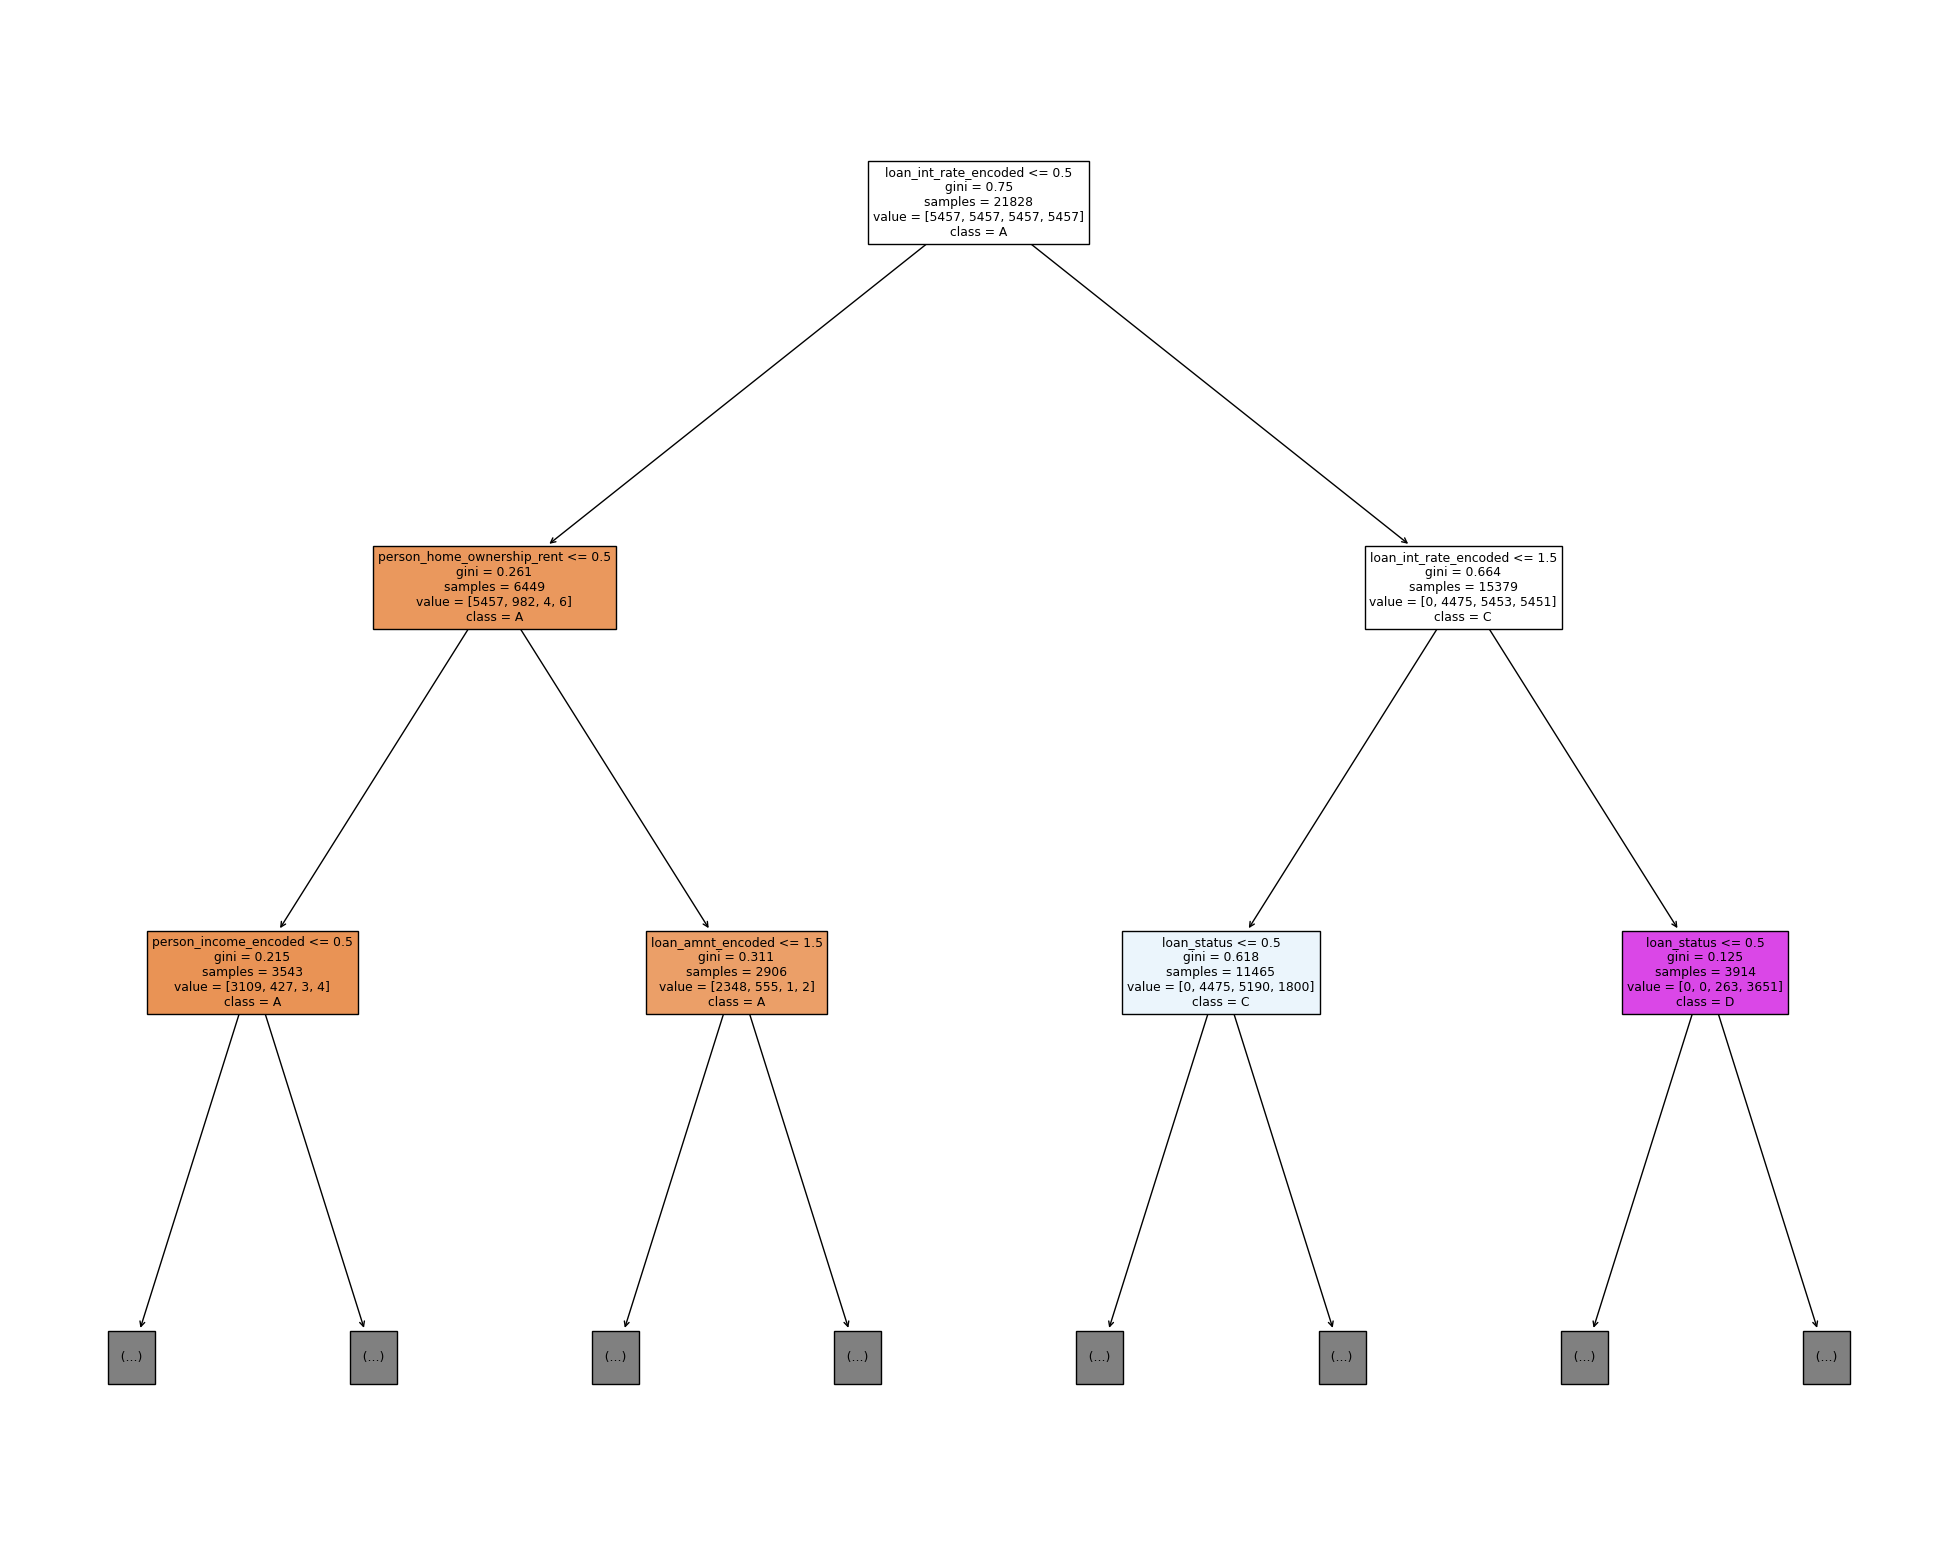

In [103]:
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(clf_tree, 
                   feature_names = list(x_train.columns),  
                   class_names = ['A', 'B', 'C', 'D'],
                   max_depth = 2,
                   filled = True)

## Train a random forest model

In [104]:
y_train_SMOTE = y_train_SMOTE.astype(np.int)

rf = RandomForestClassifier()
rf.fit(x_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

## Make predictions using the random forest model

In [105]:
y_test_encoded = y_test.astype(int)

rf_y_pred = rf.predict(x_test)
print(Counter(rf_y_pred))

Counter({0: 2684, 2: 2023, 3: 1093, 1: 1066})


In [106]:
results['loan_grade_pred'] = rf_y_pred[:5]
results

,loan_grade,dloan_grade_pred,person_home_ownership_own,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_rent,loan_intent_education,loan_intent_venture,loan_intent_personal,loan_intent_medical,loan_intent_debt_consolidation,loan_intent_home_renovation,loan_status,person_age_encoded,person_income_encoded,loan_amnt_encoded,person_emp_length_encoded,loan_int_rate_encoded,loan_grade_pred
12955,1,3,0,1,0,0,1,0,0,0,0,0,False,0,1,1,1,1,2
7078,3,3,0,0,0,1,0,1,0,0,0,0,False,0,1,1,0,2,3
15442,2,2,0,0,0,1,0,0,1,0,0,0,False,0,1,2,0,1,2
5011,1,1,0,1,0,0,0,0,0,1,0,0,False,0,1,1,1,1,1
6490,0,0,0,0,0,1,0,0,0,1,0,0,False,0,1,1,0,0,0


## Obtain the random forest model's score

In [107]:
accuracy_score(y_test_encoded, rf_y_pred)

0.6484124672298281

## Train a gradient boosting model

In [108]:
# Convert the target variable to integers
y_train_SMOTE = y_train_SMOTE.astype(np.int)

# Create and fit the XGBoost classifier
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(x_train_SMOTE, y_train_SMOTE)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

## Make predictions using the gradient boosting model

In [109]:
y_test_encoded = y_test.astype(int)
xgb_y_pred = xgb.predict(x_test)
print(Counter(xgb_y_pred))

Counter({0: 2694, 2: 2043, 3: 1076, 1: 1053})


In [110]:
results['loan_grade_pred'] = xgb_y_pred[:5]
results

,loan_grade,dloan_grade_pred,person_home_ownership_own,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_rent,loan_intent_education,loan_intent_venture,loan_intent_personal,loan_intent_medical,loan_intent_debt_consolidation,loan_intent_home_renovation,loan_status,person_age_encoded,person_income_encoded,loan_amnt_encoded,person_emp_length_encoded,loan_int_rate_encoded,loan_grade_pred
12955,1,3,0,1,0,0,1,0,0,0,0,0,False,0,1,1,1,1,2
7078,3,3,0,0,0,1,0,1,0,0,0,0,False,0,1,1,0,2,3
15442,2,2,0,0,0,1,0,0,1,0,0,0,False,0,1,2,0,1,2
5011,1,1,0,1,0,0,0,0,0,1,0,0,False,0,1,1,1,1,1
6490,0,0,0,0,0,1,0,0,0,1,0,0,False,0,1,1,0,0,0


## Obtain the gradient boosting model's score

In [111]:
accuracy_score(y_test_encoded, xgb_y_pred)

0.6523448878531897

## Train a naïve Bayes model

In [112]:
y_train_SMOTE = y_train_SMOTE.astype(np.int)
gnb = GaussianNB()
gnb.fit(x_train_SMOTE, y_train_SMOTE)

GaussianNB()

In [113]:
y_test_encoded = y_test.astype(int)
gnb_y_pred = gnb.predict(x_test)
print(Counter(gnb_y_pred))

Counter({2: 3083, 0: 2719, 3: 988, 1: 76})


In [114]:
results['loan_grade_pred'] = gnb_y_pred[:5]
results

,loan_grade,dloan_grade_pred,person_home_ownership_own,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_rent,loan_intent_education,loan_intent_venture,loan_intent_personal,loan_intent_medical,loan_intent_debt_consolidation,loan_intent_home_renovation,loan_status,person_age_encoded,person_income_encoded,loan_amnt_encoded,person_emp_length_encoded,loan_int_rate_encoded,loan_grade_pred
12955,1,3,0,1,0,0,1,0,0,0,0,0,False,0,1,1,1,1,2
7078,3,3,0,0,0,1,0,1,0,0,0,0,False,0,1,1,0,2,3
15442,2,2,0,0,0,1,0,0,1,0,0,0,False,0,1,2,0,1,2
5011,1,1,0,1,0,0,0,0,0,1,0,0,False,0,1,1,1,1,2
6490,0,0,0,0,0,1,0,0,0,1,0,0,False,0,1,1,0,0,0


## Obtain the naïve Bayes model's score

In [115]:
accuracy_score(y_test_encoded, gnb_y_pred)

0.6224876201572969

## Compare evaluation metrics for each model

In [116]:
models = ['Logistic Regression', 'Naïve Bayes', 'SVM', 'k-NN',
          'Decision Tree', 'Random Forest', 'XGBoost', 'Dummy Classifier']

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

pred_list = ['logreg_y_pred', 'gnb_y_pred', 'svm_y_pred', 'knn_y_pred',
             'clf_tree_y_pred','rf_y_pred', 'xgb_y_pred', 'dummy_y_pred']

# Baseline algorithm.
dummy = DummyClassifier(strategy = 'stratified')
dummy.fit(x_train_SMOTE, y_train_SMOTE)
dummy_y_pred = dummy.predict(x_test)

scores = np.empty((0, 4))

for i in pred_list:
    scores = np.append(scores,
                       np.array([[accuracy_score(y_test_encoded, globals()[i]),
                                  precision_score(y_test_encoded, globals()[i], average='weighted'),  # Specify 'weighted' here
                                  recall_score(y_test_encoded, globals()[i], average='weighted'),     # Specify 'weighted' here
                                  f1_score(y_test_encoded, globals()[i], average='weighted')]]),   # Specify 'weighted' here
                       axis=0)

scores = np.around(scores, 4)

scoring_df = pd.DataFrame(scores, index = models, columns = metrics)
scoring_df.sort_values(by = 'F1', ascending = False)

,Accuracy,Precision,Recall,F1
Decision Tree,0.6496,0.6465,0.6496,0.6296
XGBoost,0.6523,0.6504,0.6523,0.6295
Random Forest,0.6484,0.6445,0.6484,0.6255
Naïve Bayes,0.6225,0.6419,0.6225,0.5360
k-NN,0.5498,0.5673,0.5498,0.5151
SVM,0.5296,0.5647,0.5296,0.4525
Logistic Regression,0.4849,0.3261,0.4849,0.3699
Dummy Classifier,0.2581,0.2824,0.2581,0.2645


## Generate a confusion matrix

In [117]:
confusion_matrix(y_test_encoded, clf_tree_y_pred) 

array([[2303,   28,    0,    0],
       [ 383,  617, 1065,  125],
       [   0,  411,  775,  160],
       [   1,   80,  153,  765]], dtype=int64)

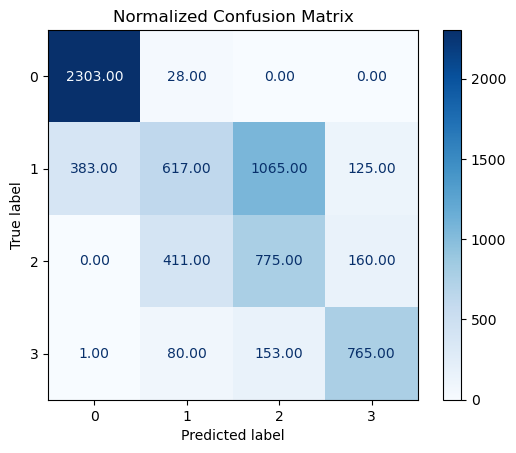

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming xgb_y_pred is the predicted labels and y_test is the true labels

# Calculate confusion matrix
cm = confusion_matrix(y_test_encoded, clf_tree_y_pred)

# Get unique class labels
class_labels = sorted(set(y_test_encoded) | set(clf_tree_y_pred))

# Display confusion matrix with a specific colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")

# Customize plot if needed
disp.ax_.set_title("Normalized Confusion Matrix")

# Show the plot
plt.show()


## Plot a ROC curve

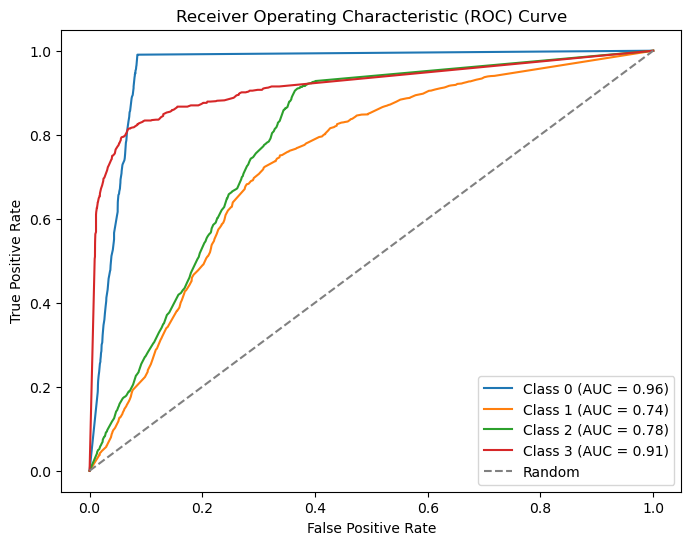

In [119]:
from sklearn.metrics import roc_curve, auc
# Get decision function scores
y_scores = clf_tree.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(4):  # num_classes is the number of classes in your problem
    fpr, tpr, _ = roc_curve(y_test_encoded == i, y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Plot a precision–recall curve

NaN indices in y_scores: (array([2176, 2657, 2863, 3129, 3486, 3773], dtype=int64),)
NaN indices in y_test_bin: (array([], dtype=int64),)


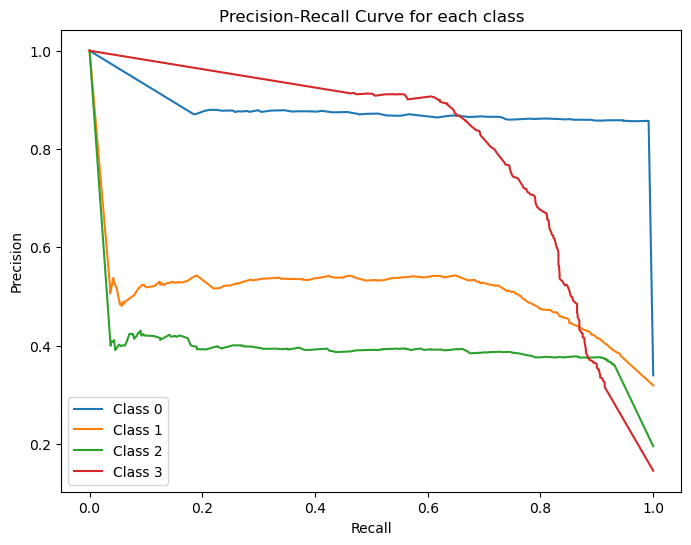

In [120]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Create a binary classifier using One-vs-Rest strategy
clf_tree_ovr = OneVsRestClassifier(DecisionTreeClassifier())

# Fit the classifier on the training data
clf_tree_ovr.fit(x_train_SMOTE, y_train_SMOTE)

# Get decision function scores
y_scores = clf_tree_ovr.predict_proba(x_test)

# Binarize the labels
y_test_bin = label_binarize(y_test_encoded, classes=list(range(4)))

# Check for NaN values
nan_indices_scores = np.isnan(y_scores).any(axis=1)
nan_indices_test_bin = np.isnan(y_test_bin).any(axis=1)

print("NaN indices in y_scores:", np.where(nan_indices_scores))
print("NaN indices in y_test_bin:", np.where(nan_indices_test_bin))

# Remove rows with NaN values
non_nan_indices = ~nan_indices_scores & ~nan_indices_test_bin
y_scores = y_scores[non_nan_indices]
y_test_bin = y_test_bin[non_nan_indices]

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(4):  # num_classes is the number of classes in your problem
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()


## Generate a feature importance plot

In [121]:
def feature_importance_plot(model, X_train, n):
    """Plots feature importance. Only works for ensemble learning."""
    plt.figure(figsize = (8, 5))
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'barh')
    plt.title(f'Top {n} Features')
    plt.show()

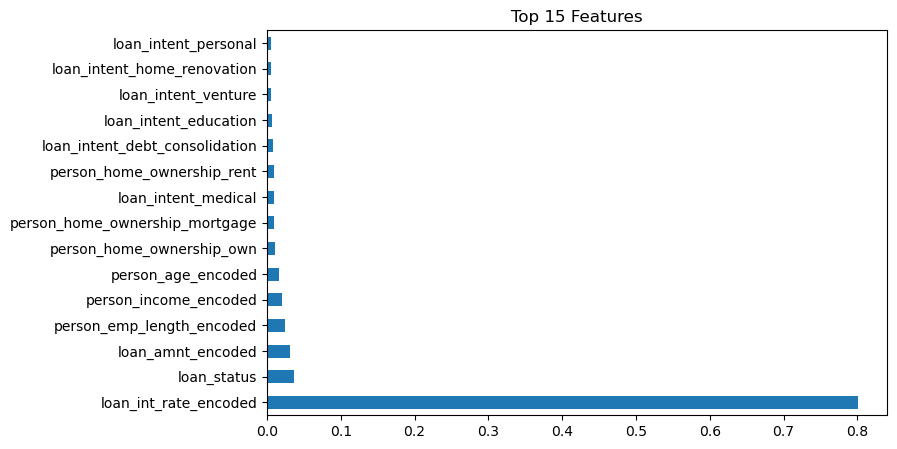

In [122]:
feature_importance_plot(clf_tree, x_train_SMOTE, 15)

## Plot learning curves

In [123]:
def plot_learning_curves(model, x_train, y_train):
    """Plots learning curves for model validation."""
    plt.figure(figsize = (5, 5))
    train_sizes, train_scores, test_scores = \
    learning_curve(model, x_train, y_train, cv = 5,
                   scoring = 'accuracy', n_jobs = -1,
                   shuffle = True,
                   train_sizes = np.linspace(0.01, 1.0, 5))
        
    # Means of training and test set scores.
    train_mean = np.mean(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    # Draw lines.
    plt.plot(train_sizes, train_mean, '--',
             color = '#111111', label = 'Training score')
    plt.plot(train_sizes, test_mean,
             color = '#111111', label = 'Cross-validation score')

    # Create plot.
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc = 'best')
    plt.tight_layout()

    plt.show()

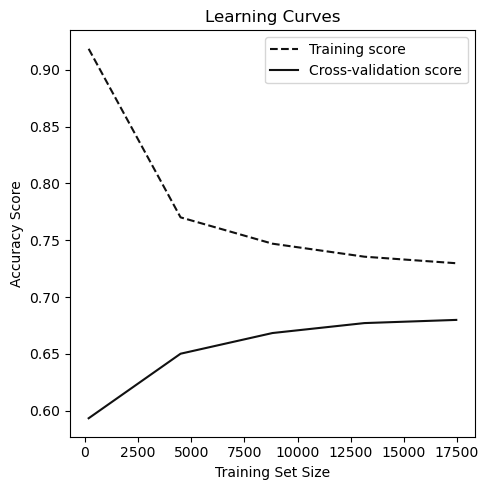

In [124]:
plot_learning_curves(clf_tree, x_train_SMOTE, y_train_SMOTE)